In [1]:
import pandas as pd
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

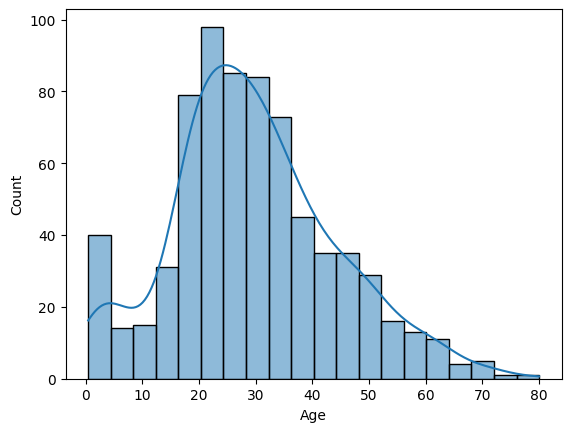

In [6]:
plt.plot(figsize=(6,4))
sns.histplot(train_data['Age'], kde=True)
plt.show()

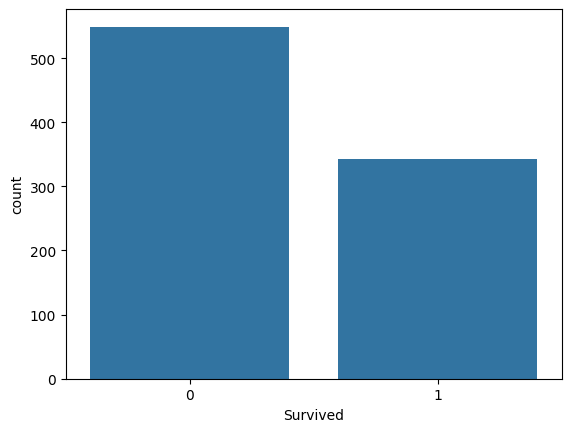

In [7]:
plt.plot(figsize=(6,4))
sns.countplot(x='Survived', data=train_data)
plt.show()

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
clean_data=train_data.drop('Cabin',axis=1)

In [10]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
median_age=clean_data['Age'].median()
median_age

28.0

In [12]:
clean_data['Age'].fillna(median_age,inplace=True)
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
clean_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
mode_embarked=clean_data['Embarked'].mode()[0]
mode_embarked

'S'

In [15]:
clean_data['Embarked'].fillna(mode_embarked,inplace=True)

In [16]:
numerical_features=['Age','SibSp','Parch','Fare']


C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_16196\2838241043.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


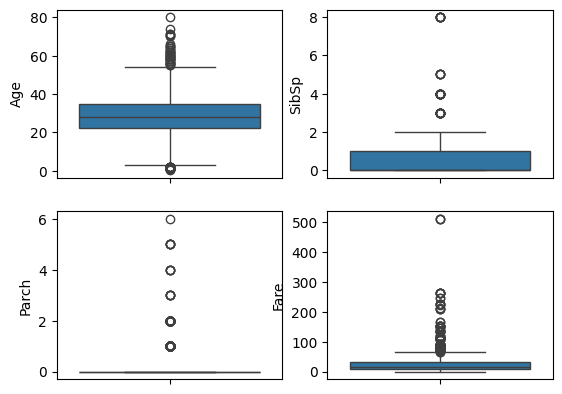

In [17]:
plt.plot(figsize=(20,20))
for i,col in enumerate(numerical_features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=clean_data[col])
plt.show()

C:\Users\Ideapad Gaming 3\AppData\Local\Temp\ipykernel_16196\4272419500.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


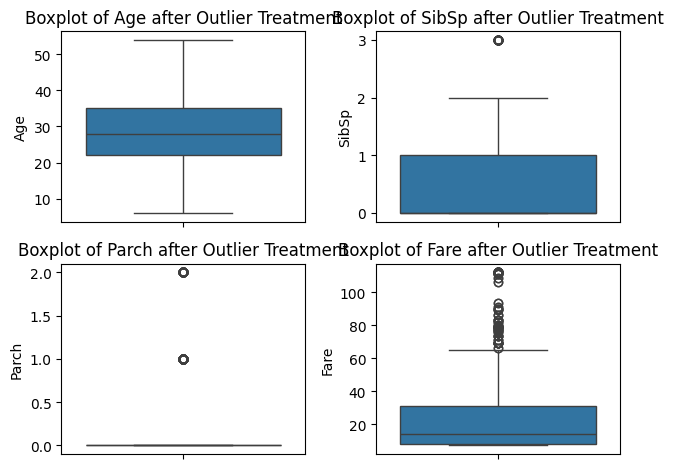

In [18]:
import numpy as np



for col in numerical_features:
    lower_percentile=clean_data[col].quantile(0.05)
    upper_percentile=clean_data[col].quantile(0.95)

    clean_data[col]=np.where(clean_data[col] < lower_percentile,lower_percentile,clean_data[col])
    clean_data[col]=np.where(clean_data[col] > upper_percentile,upper_percentile,clean_data[col])


plt.plot(figsize=(15,10))
for i,col in enumerate(numerical_features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=clean_data[col])
    plt.title(f'Boxplot of {col} after Outlier Treatment')

plt.tight_layout()
plt.show()



    

In [19]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S


In [20]:
test_clean_data=test_data.drop('Cabin',axis=1)
median_aget=test_clean_data['Age'].median()
test_clean_data['Age'].fillna(median_aget,inplace=True)
mode_embarkedt=test_clean_data['Embarked'].mode()[0]
test_clean_data['Embarked'].fillna(mode_embarkedt,inplace=True)

In [21]:
average_fare=test_clean_data['Fare'].mean()
test_clean_data['Fare'].fillna(average_fare,inplace=True)



In [22]:
test_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [23]:
data_encoding=pd.get_dummies(clean_data,columns=['Sex','Embarked'],dtype=int)
test_data_encoding=pd.get_dummies(test_clean_data,columns=['Sex','Embarked'],dtype=int)

In [24]:
data_encoding.head(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",28.0,0.0,0.0,330877,8.4583,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0.0,0.0,17463,51.8625,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",6.0,3.0,1.0,349909,21.0750,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0.0,2.0,347742,11.1333,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1.0,0.0,237736,30.0708,1,0,1,0,0


In [25]:
test_data_encoding.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1


In [26]:
data_encoding=data_encoding.drop(['Name','Ticket'],axis=1)
test_data_encoding=test_data_encoding.drop(['Name','Ticket'],axis=1)


In [27]:
test_data_encoding.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [28]:
data_encoding.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1.0,0.0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1.0,0.0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0.0,0.0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1.0,0.0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0.0,0.0,8.0500,0,1,0,0,1
5,6,0,3,28.0,0.0,0.0,8.4583,0,1,0,1,0
6,7,0,1,54.0,0.0,0.0,51.8625,0,1,0,0,1
7,8,0,3,6.0,3.0,1.0,21.0750,0,1,0,0,1
8,9,1,3,27.0,0.0,2.0,11.1333,1,0,0,0,1
9,10,1,2,14.0,1.0,0.0,30.0708,1,0,1,0,0


In [29]:
y_train=data_encoding['Survived']
X_train=data_encoding.drop(['Survived'],axis=1)
X_test=test_data_encoding

In [30]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1.0,0.0,7.2500,0,1,0,0,1
1,2,1,38.0,1.0,0.0,71.2833,1,0,1,0,0
2,3,3,26.0,0.0,0.0,7.9250,1,0,0,0,1
3,4,1,35.0,1.0,0.0,53.1000,1,0,0,0,1
4,5,3,35.0,0.0,0.0,8.0500,0,1,0,0,1


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rt_classifier=RandomForestClassifier(n_estimators=100, random_state=42)
rt_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
predictions=rt_classifier.predict(X_test)


In [34]:
predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
result_df=pd.DataFrame({
    'PassengerId':X_test.PassengerId,
    'Survived':predictions})

In [36]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [37]:
result_df.to_csv('Predictions.csv', index=False)